<a href="https://colab.research.google.com/github/TAUforPython/wavelets/blob/main/DFT_and_CFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

пример сравнения непрерывного и дискретного преобразования сигнала

https://dspillustrations.com/pages/posts/misc/approximating-the-fourier-transform-with-dft.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
def cft(g, f):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""
    result = np.zeros(len(f), dtype=complex)

    # Loop over all frequencies and calculate integral value
    for i, ff in enumerate(f):
        # Evaluate the Fourier Integral for a single frequency ff,
        # assuming the function is time-limited to abs(t)<5
        result[i] = complex_quad(lambda t: g(t)*np.exp(-2j*np.pi*ff*t), -5, 5)
    return result

def complex_quad(g, a, b):
    """Return definite integral of complex-valued g from a to b,
    using Simpson's rule"""
    # 2501: Amount of used samples for the trapezoidal rule
    t = np.linspace(a, b, 2501)
    x = g(t)
    return integrate.simps(y=x, x=t)

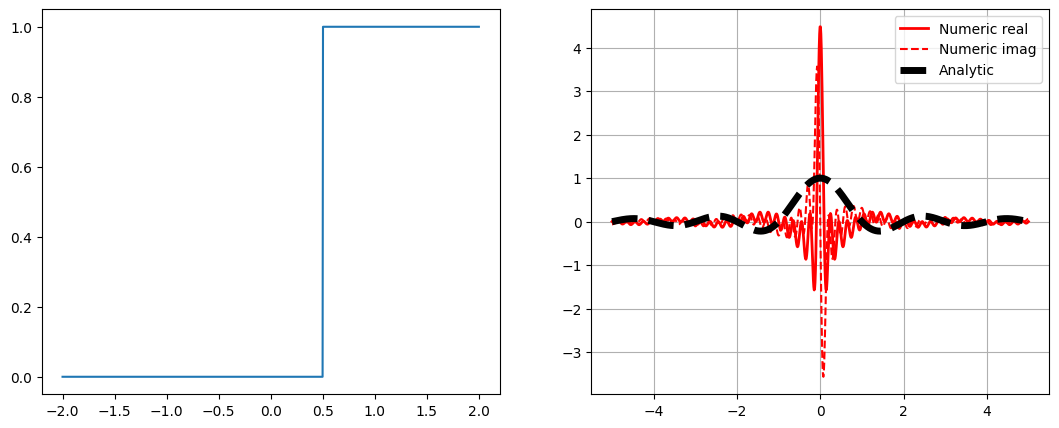

In [ ]:
def rect(t):
    return ((t) > 0.5).astype(float)

t = np.linspace(-2,2, 1000)
f = np.linspace(-5, 5, 1000)
R = cft(rect, f)  # Calculate the numeric Fourier Transform of the rect function

fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].plot(t, rect(t))
axs[1].plot(f, R.real, 'r-', lw=2, label='Numeric real')
axs[1].plot(f, R.imag, 'r--', label='Numeric imag')
axs[1].plot(f, np.sin(np.pi*f)/(np.pi*f), 'k--', lw=5, label='Analytic')
plt.legend()
plt.grid()
plt.show()

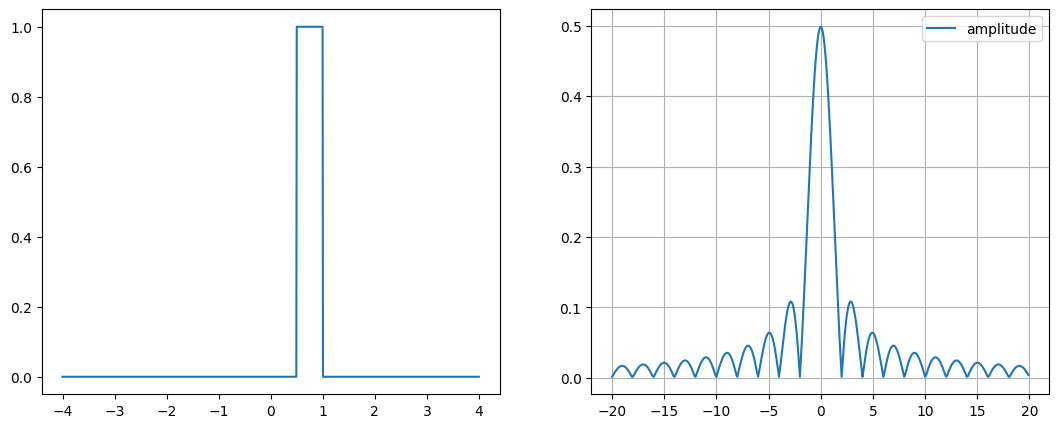

In [ ]:
g = lambda t: (rect(t) - rect(t-0.5)) #* np.exp(-t*t)  # define the function
t0 = 4
f_full = np.arange(-20, 20, 0.1)
t_full = np.linspace(-t0, t0, 1000)
G_exact = cft(g, f_full)  # calculate Fourier Transform of the function

fig, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(t_full, g(t_full))
axs[1].plot(f_full, abs(G_exact), label='amplitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def compareCFTandDFT(Fs):
    t = np.arange(-t0, t0, 1./Fs)
    f = np.linspace(-Fs/2, Fs/2, len(t), endpoint=False)
    # Calculate the approximate Fourier Transform according to the derived rule.
    G_approx = np.fft.fftshift(np.fft.fft(g(t)) * np.exp(-2j*np.pi*f*t0) * 1/Fs)
    return G_approx, f

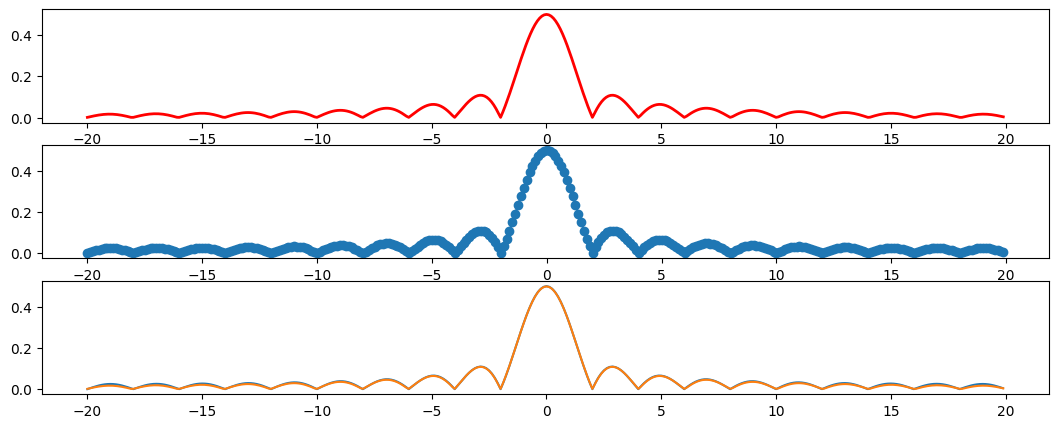

In [ ]:
Fs = 40
(G_approx, f) = compareCFTandDFT(Fs=Fs)

fig, axs = plt.subplots(3,1,figsize=(13,5))
axs[0].plot(f_full, abs(G_exact), 'r-', lw=2)
axs[1].plot(f, abs(G_approx), 'o-')
axs[2].plot(f, abs(G_approx),f_full,abs(G_exact))

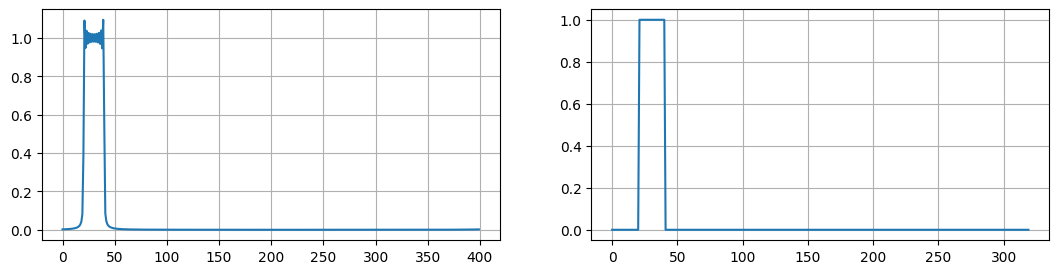

In [ ]:
y_ifft_exact = np.fft.ifft(G_exact)
y_ifft_approx = np.fft.ifft(G_approx)

fig, axs = plt.subplots(1,2,figsize=(13,3))
axs[0].plot(abs(y_ifft_exact)*Fs)
axs[1].plot(abs(y_ifft_approx)*Fs)
axs[0].grid()
axs[1].grid()
plt.show()

# Аналитическая формула преобразования Фурье

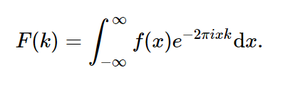

In [ ]:
from sympy import fourier_transform, exp, sin, cos
from sympy.abc import x, k

# Using fourier_transform() method
gfg = fourier_transform(exp(-x**2), x, k, noconds = False)
print(gfg)

(sqrt(pi)*exp(-pi**2*k**2), True)
